#**An√°lise hist√≥rica do √çndice Geral de Pre√ßos - Mercado (IGP-M) de 2004 a 2024**

A base de dados foi coletada nos sites: `https://abacusliquid.com/igp-m-historico/` e `https://portal.fgv.br/noticias/igp-m-agosto-2024`.

Dispon√≠vel em csv no drive: `https://drive.google.com/file/d/1QkI7WXd2QOOPb6qRTr_IG2AqT1jOoeOF/view?usp=sharing`.

Apresenta√ß√£o em slide : https://www.canva.com/design/DAGPPVCQHMY/FLE1HyXTtMFEl9uVBxGAlA/edit?utm_content=DAGPPVCQHMY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

```
obs.: convertida por mim como arquivo csv.
```



## **Procedimentos de tratamento e an√°lise dos dados do IGP-M**

In [ ]:
#Bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
 #Dados est√£o atualizados at√© agosto de 2024
df_igpm = pd.read_csv('/content/igpm_analise.csv')
df_igpm.tail()

M√™s/Ano  M√™s (%)  Acumulado no Ano (%)  \
243  04-2024     0.31               -0.6111   
244  05-2024     0.89                0.2735   
245  06-2024     0.81                1.0857   
246  07-2024     0.61                1.7023   
247  08-2024     0.29                2.0000   

     Acumulado nos √öltimos 12 Meses (%)  Acumulado a partir de Jan/93  
243                             -3.0409                     2689.9298  
244                             -0.3443                     2713.8702  
245                              2.4400                     2735.8525  
246                              3.8124                     2752.5412  
247                              4.2600                     2754.8312

In [ ]:
#Visualizar meses de forma cronol√≥gica
df = df_igpm.copy()
df['M√™s/Ano'] = pd.to_datetime(df['M√™s/Ano'], format='%m-%Y')

In [ ]:
#Conhecendo dados do csv para tratar caso necess√°rio
num_linhas = df_igpm.shape[0]
num_colunas = df_igpm.shape[1]
colunas = df_igpm.columns.values

print(f"N√∫mero de linhas: {num_linhas} \n"
      f"N√∫mero de colunas: {num_colunas} \n"
      f"Colunas: {colunas} \n")

N√∫mero de linhas: 248 
N√∫mero de colunas: 5 
Colunas: ['M√™s/Ano' 'M√™s (%)' 'Acumulado no Ano (%)'
 'Acumulado nos √öltimos 12 Meses (%)' 'Acumulado a partir de Jan/93'] 



In [ ]:
# Conferindo dados das colunas do dataframe
df_igpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   M√™s/Ano                             248 non-null    object 
 1   M√™s (%)                             248 non-null    float64
 2   Acumulado no Ano (%)                248 non-null    float64
 3   Acumulado nos √öltimos 12 Meses (%)  248 non-null    float64
 4   Acumulado a partir de Jan/93        248 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.8+ KB


In [ ]:
#Descri√ß√£o estat√≠stica - medidas descritivas
df_igpm.describe()

M√™s (%)  Acumulado no Ano (%)  Acumulado nos √öltimos 12 Meses (%)  \
count  248.000000            248.000000                          248.000000   
mean     0.553347              3.795092                            7.026238   
std      0.836684              4.624039                            6.996782   
min     -1.930000             -5.279100                           -7.714000   
25%      0.077500              0.785325                            3.434650   
50%      0.500000              2.760150                            6.513650   
75%      0.890000              6.075425                            9.802625   
max      4.340000             23.139100                           37.063000   

       Acumulado a partir de Jan/93  
count                    248.000000  
mean                    1497.010310  
std                      649.992298  
min                      714.747900  
25%                      978.269800  
50%                     1318.831150  
75%                     1772.633625  
max                     2873.086500

In [ ]:
# M√©dia de cada coluna, interessante analisar a m√©dia do acumulado no ano e no acumulado nos √∫ltimos 12 meses.
df[colunas].mean()

M√™s/Ano                               2014-04-16 17:01:56.129032192
M√™s (%)                                                    0.553347
Acumulado no Ano (%)                                       3.795092
Acumulado nos √öltimos 12 Meses (%)                         7.026238
Acumulado a partir de Jan/93                             1497.01031
dtype: object

In [ ]:
#Enfoque nas colunas dos percentuais do IGP-M acumulado no ano e no acumulado nos √∫ltimos 12 meses.
acumulado_ano = df['Acumulado no Ano (%)']
acumulado_12meses = df['Acumulado nos √öltimos 12 Meses (%)']
acumulado_ano

0      0.8800
1      1.5761
2      2.7239
3      3.9668
4      5.3288
        ...  
243   -0.6111
244    0.2735
245    1.0857
246    1.7023
247    2.0000
Name: Acumulado no Ano (%), Length: 248, dtype: float64

### **IGP-M acumulado no ano:** √≠ndice que considera a varia√ß√£o dos pre√ßos desde o in√≠cio do ano at√© o m√™s atual.

In [ ]:
import numpy as np

# Calcular a m√©dia, desvio padr√£o, valor m√≠nimo, primeiro e terceiro quartis e valor m√°ximo dos percentuais do IGP-M acumulado no ano
print("M√©dia:",np.mean(acumulado_ano))
print("Desvio Padr√£o:",np.std(acumulado_ano))
print("Valor m√≠nimo:",np.min(acumulado_ano))
print("Primeiro Quartil:",np.quantile(acumulado_ano,0.25))
print("Mediana (Q2):",np.median(acumulado_ano))
print("Terceiro Quartil:",np.quantile(acumulado_ano,0.75))
print("Valor m√°ximo:",np.max(acumulado_ano))

M√©dia: 3.795092338709678
Desvio Padr√£o: 4.61470691560332
Valor m√≠nimo: -5.2791
Primeiro Quartil: 0.785325
Mediana (Q2): 2.7601500000000003
Terceiro Quartil: 6.075425
Valor m√°ximo: 23.1391


<function matplotlib.pyplot.show(close=None, block=None)>

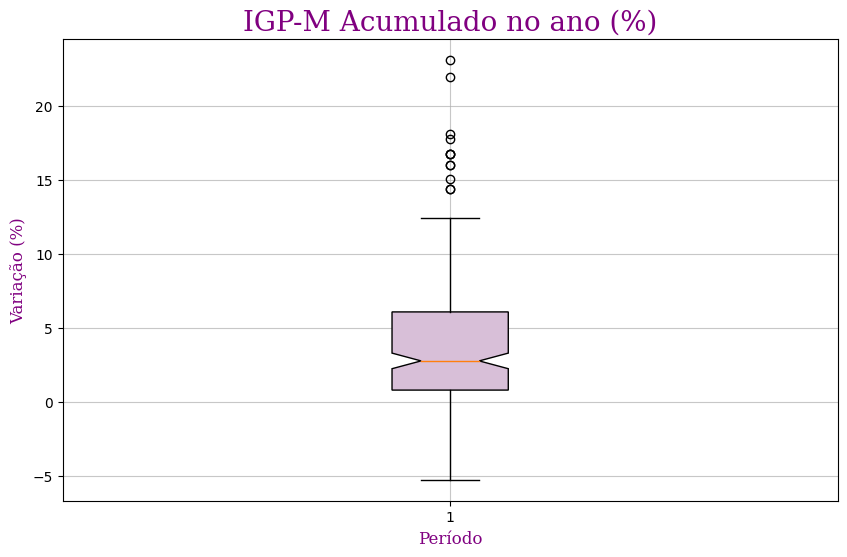

In [ ]:
plt.figure(figsize=(10, 6))
boxplot_ano = plt.boxplot(acumulado_ano, patch_artist=True, notch=True, vert=True)
for patch in boxplot_ano['boxes']:
    patch.set_facecolor('#D8BFD8')

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('IGP-M Acumulado no ano (%)', fontdict=font1)
plt.xlabel('Per√≠odo', fontdict=font2)
plt.ylabel('Varia√ß√£o (%)', fontdict=font2)
plt.grid(True, linestyle='-', alpha=0.7)
plt.show


###**IGP-M dos √∫ltimos 12 meses:** √≠ndice que considera a varia√ß√£o dos pre√ßos nos √∫ltimos 12 meses completos.

In [ ]:
# Calcular a m√©dia, desvio padr√£o, valor m√≠nimo, primeiro e terceiro quartis e valor m√°ximo dos percentuais do IGM_M acumulado nos √∫ltimos 12 meses
print("M√©dia:",np.mean(acumulado_12meses))
print("Desvio Padr√£o:",np.std(acumulado_12meses))
print("Valor m√≠nimo:",np.min(acumulado_12meses))
print("Primeiro Quartil:",np.quantile(acumulado_12meses,0.25))
print("Mediana (Q2):",np.median(acumulado_12meses))
print("Terceiro Quartil:",np.quantile(acumulado_12meses,0.75))
print("Valor m√°ximo:",np.max(acumulado_12meses))

M√©dia: 7.026237500000001
Desvio Padr√£o: 6.982661611096852
Valor m√≠nimo: -7.714
Primeiro Quartil: 3.4346500000000004
Mediana (Q2): 6.51365
Terceiro Quartil: 9.802625
Valor m√°ximo: 37.063


<function matplotlib.pyplot.show(close=None, block=None)>

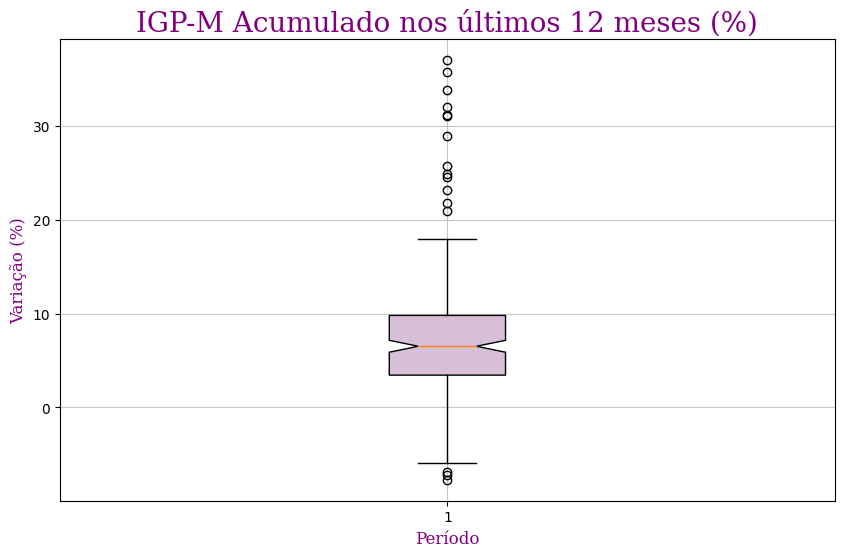

In [ ]:
plt.figure(figsize=(10, 6))
boxplot_ano = plt.boxplot(acumulado_12meses, patch_artist=True, notch=True, vert=True)
for patch in boxplot_ano['boxes']:
    patch.set_facecolor('#D8BFD8')

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('IGP-M Acumulado nos √∫ltimos 12 meses (%)', fontdict=font1)
plt.xlabel('Per√≠odo', fontdict=font2)
plt.ylabel('Varia√ß√£o (%)', fontdict=font2)
plt.grid(True, linestyle='-', alpha=0.7)
plt.show

As diferen√ßas entre os dois boxplots indicam que o **IGP-M acumulado dos √∫ltimos 12 meses** √© sempre um per√≠odo superior ou igual ao **acumulado no ano**, a m√©dia do IGP-M dos √∫ltimos 12 meses √© significativamente maior. Isto ocorre porque a varia√ß√£o dos pre√ßos √© maior ao considerar um per√≠odo mais longo.

Logo, √© importante ressaltar que o **O IGP-M dos √∫ltimos 12 meses** oferece uma vis√£o mais ampla e hist√≥rica das varia√ß√µes de pre√ßos, identificando tend√™ncias de longo prazo e suavizando flutua√ß√µes sazonais.

## **Plotar gr√°ficos que est√£o presentes na apresenta√ß√£o dos *slides***

## Import√¢ncia do IGP-M no Contexto Econ√¥mico

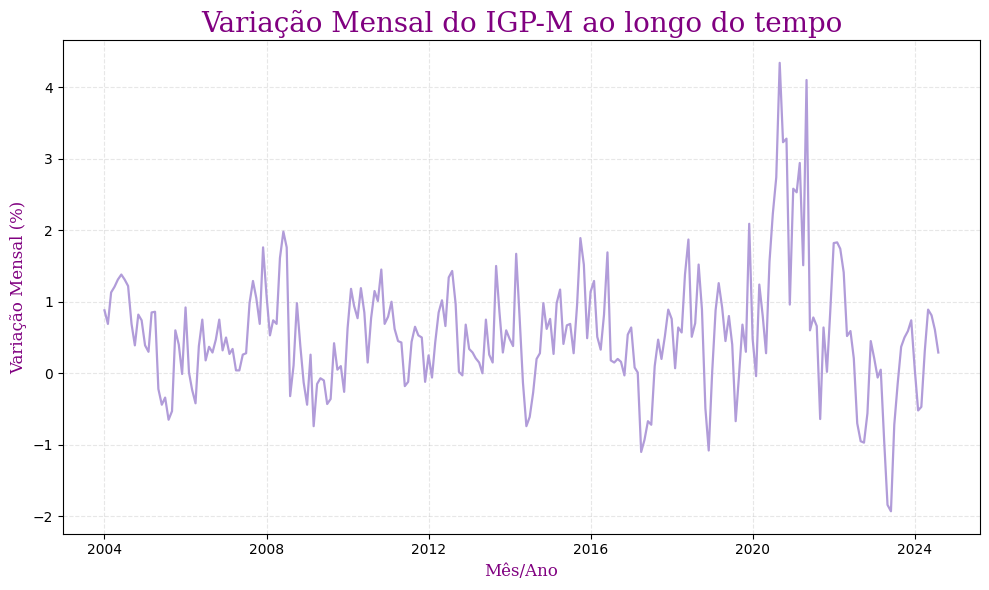

In [ ]:
# Import√¢ncia do IGP-M no contexto econ√¥mico

#Varia√ß√£o mensal do IGP-M para ilustrar como os reajustes podem ocorrer com o tempo
plt.figure(figsize=(10, 6))
plt.plot(df['M√™s/Ano'], df['M√™s (%)'], linestyle='-', color='#b19cd9', linewidth=1.6)

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('Varia√ß√£o Mensal do IGP-M ao longo do tempo', fontdict=font1)
plt.xlabel('M√™s/Ano', fontdict = font2)
plt.ylabel('Varia√ß√£o Mensal (%)', fontdict = font2)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

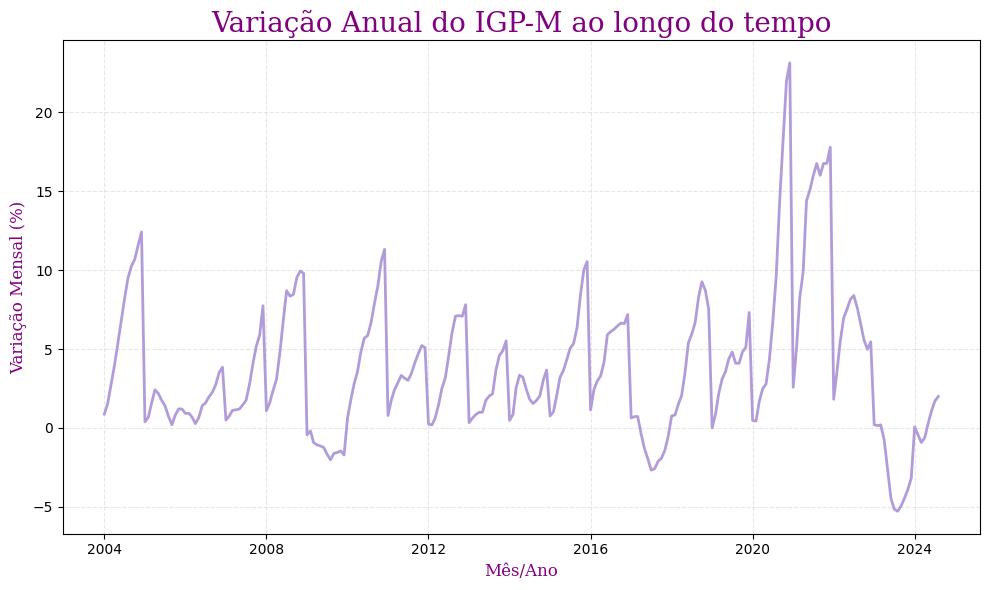

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['M√™s/Ano'], df['Acumulado no Ano (%)'], linestyle='-', color='#b19cd9', linewidth=2)

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('Varia√ß√£o Anual do IGP-M ao longo do tempo', fontdict=font1)
plt.xlabel('M√™s/Ano', fontdict = font2)
plt.ylabel('Varia√ß√£o Mensal (%)', fontdict = font2)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

## Evolu√ß√£o do IGP-M (2004-2010)

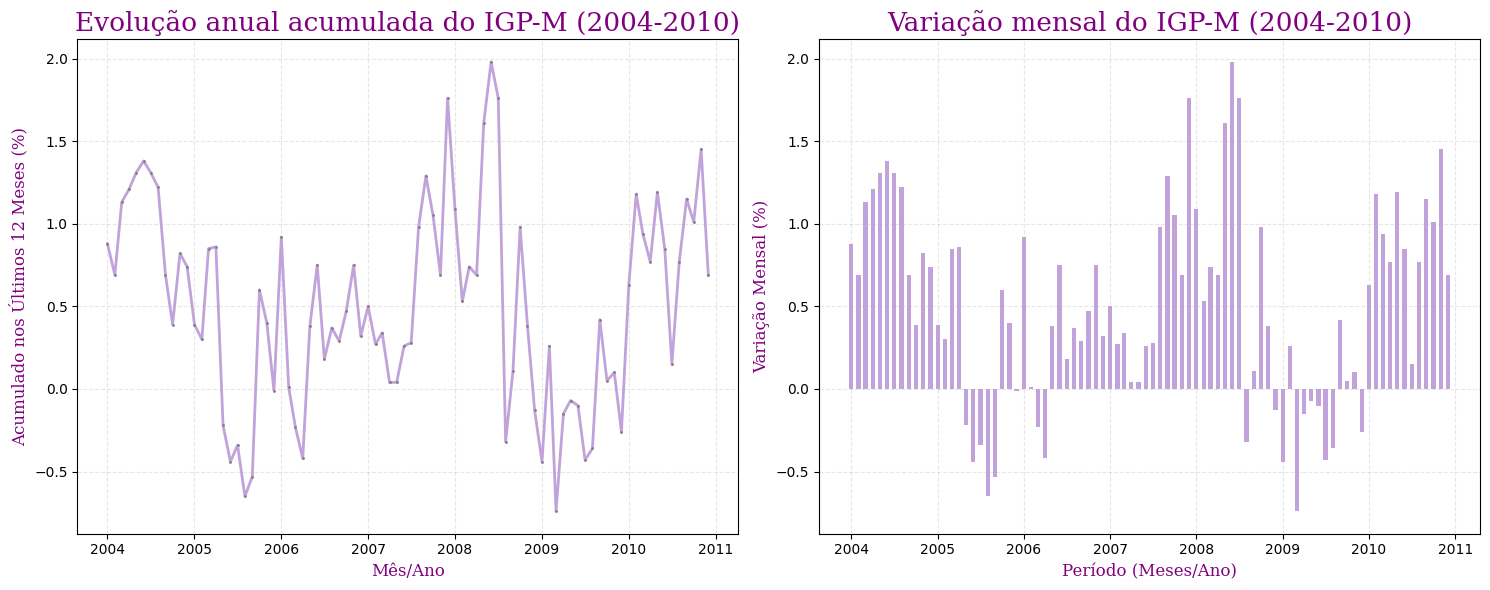

In [ ]:
#Evolu√ß√£o do IGP-M (2004-2010)
inicio_2004 = '01-2004'
fim_2010 = '12-2010'
evolucao_igpm1 = df[(df['M√™s/Ano'] >= inicio_2004) & (df['M√™s/Ano'] <= fim_2010)]

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

#figura com dois eixos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Gr√°fico da evolu√ß√£o acumulada anual
axs[0].plot(evolucao_igpm1['M√™s/Ano'], evolucao_igpm1['M√™s (%)'], linestyle='-', color = '#c2a2da', linewidth=2, marker = 'o', ms = 1,  mec='Gray')
axs[0].set_title('Evolu√ß√£o anual acumulada do IGP-M (2004-2010)', fontdict = font1)
axs[0].set_xlabel('M√™s/Ano', fontdict = font2)
axs[0].set_ylabel('Acumulado nos √öltimos 12 Meses (%)', fontdict = font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gr√°fico da varia√ß√£o mensal
axs[1].bar(evolucao_igpm1['M√™s/Ano'], evolucao_igpm1['M√™s (%)'], color='#c2a2da', width=18)
axs[1].set_title('Varia√ß√£o mensal do IGP-M (2004-2010)', fontdict = font1)
axs[1].set_xlabel('Per√≠odo (Meses/Ano)', fontdict = font2)
axs[1].set_ylabel('Varia√ß√£o Mensal (%)', fontdict = font2)

axs[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()


## Evolu√ß√£o do IGP-M (2011-2017)

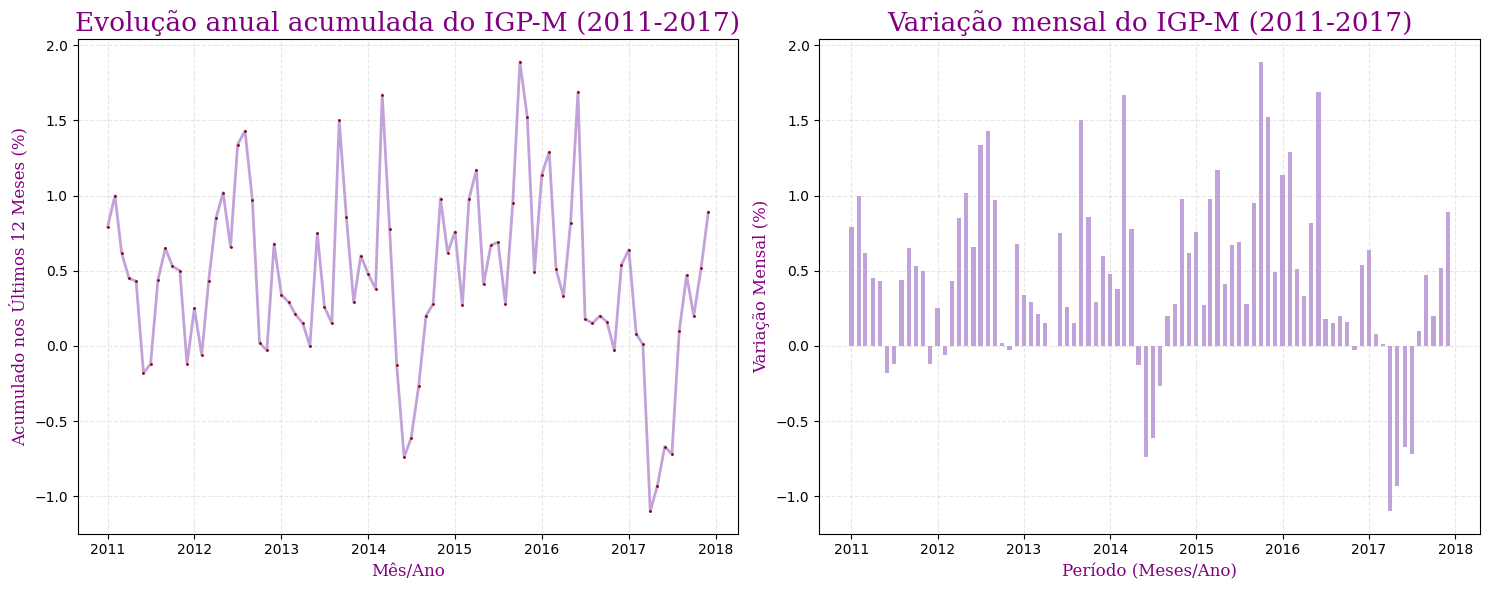

In [ ]:
#Evolu√ß√£o do IGP-M (2011-2017)
inicio_2011 = '01-2011'
fim_2017 = '12-2017'
evolucao_igpm2 = df[(df['M√™s/Ano'] >= inicio_2011) & (df['M√™s/Ano'] <= fim_2017)]

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

#figura com dois eixos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Gr√°fico da evolu√ß√£o acumulada anual
axs[0].plot(evolucao_igpm2['M√™s/Ano'], evolucao_igpm2['M√™s (%)'], linestyle='-', color = '#c2a2da', linewidth=2, marker = 'o', ms = 1,  mec='#8b0000')
axs[0].set_title('Evolu√ß√£o anual acumulada do IGP-M (2011-2017)', fontdict = font1)
axs[0].set_xlabel('M√™s/Ano', fontdict = font2)
axs[0].set_ylabel('Acumulado nos √öltimos 12 Meses (%)', fontdict = font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gr√°fico da varia√ß√£o mensal
axs[1].bar(evolucao_igpm2['M√™s/Ano'], evolucao_igpm2['M√™s (%)'], color='#c2a2da', width=18)
axs[1].set_title('Varia√ß√£o mensal do IGP-M (2011-2017)', fontdict = font1)
axs[1].set_xlabel('Per√≠odo (Meses/Ano)', fontdict = font2)
axs[1].set_ylabel('Varia√ß√£o Mensal (%)', fontdict = font2)

axs[1].grid(True, linestyle='--', alpha=0.3)


plt.tight_layout()

plt.show()

## Evolu√ß√£o do IGP-M (2018-2024)



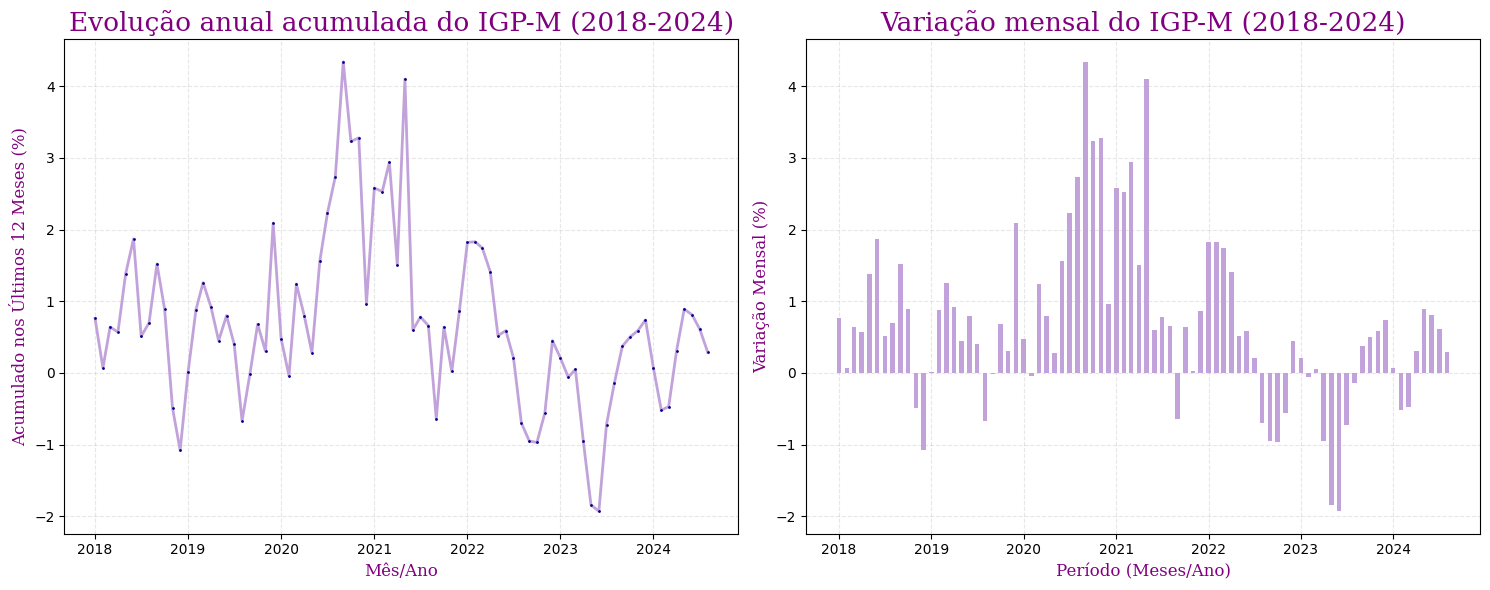

In [ ]:
#Evolu√ß√£o do IGP-M (2011-2017)
inicio_2018 = '01-2018'
fim_2024 = '08-2024'
evolucao_igpm3 = df[(df['M√™s/Ano'] >= inicio_2018) & (df['M√™s/Ano'] <= fim_2024)]

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

#figura com dois eixos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Gr√°fico da evolu√ß√£o acumulada anual
axs[0].plot(evolucao_igpm3['M√™s/Ano'], evolucao_igpm3['M√™s (%)'], linestyle='-', color = '#c2a2da', linewidth=2, marker = 'o', ms = 1,  mec='#00008b')
axs[0].set_title('Evolu√ß√£o anual acumulada do IGP-M (2018-2024)', fontdict = font1)
axs[0].set_xlabel('M√™s/Ano', fontdict = font2)
axs[0].set_ylabel('Acumulado nos √öltimos 12 Meses (%)', fontdict = font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gr√°fico da varia√ß√£o mensal
axs[1].bar(evolucao_igpm3['M√™s/Ano'], evolucao_igpm3['M√™s (%)'], color='#c2a2da', width=18)
axs[1].set_title('Varia√ß√£o mensal do IGP-M (2018-2024)', fontdict = font1)
axs[1].set_xlabel('Per√≠odo (Meses/Ano)', fontdict = font2)
axs[1].set_ylabel('Varia√ß√£o Mensal (%)', fontdict = font2)

axs[1].grid(True, linestyle='--', alpha=0.3)


plt.tight_layout()

plt.show()

## Diferen√ßa entre o IGP-M acumulado no ano e o dos √∫ltimos 12 meses

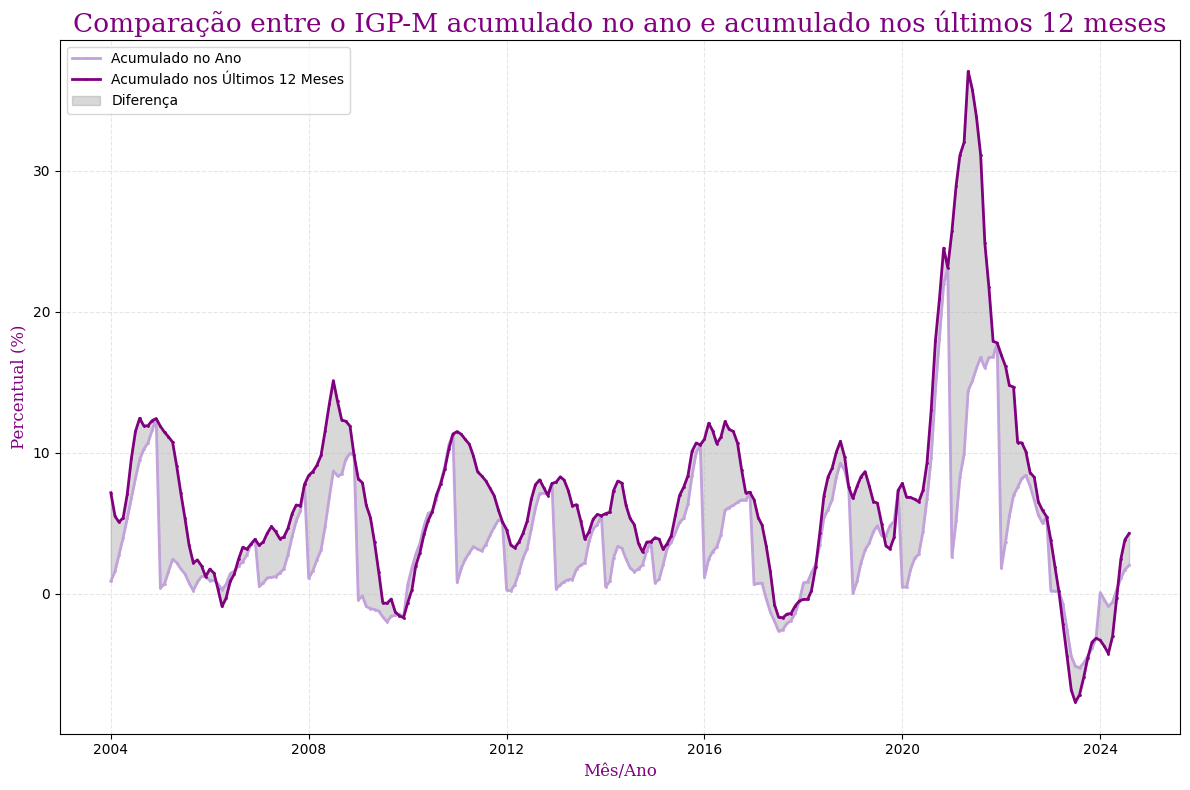

In [ ]:
df = df.sort_values(by='M√™s/Ano').reset_index(drop=True)

plt.figure(figsize=(12, 8))

# IGP-M Acumulado no Ano
plt.plot(df['M√™s/Ano'], df['Acumulado no Ano (%)'], linestyle='-', color = '#c2a2da', marker = 'o', ms = 1, label='Acumulado no Ano', linewidth=2)

# IGP-M Acumulado nos √öltimos 12 Meses
plt.plot(df['M√™s/Ano'], df['Acumulado nos √öltimos 12 Meses (%)'], linestyle='-', color='purple', marker = 'o', ms = 1, label='Acumulado nos √öltimos 12 Meses', linewidth=2)

plt.fill_between(df['M√™s/Ano'], df['Acumulado no Ano (%)'], df['Acumulado nos √öltimos 12 Meses (%)'], color='gray', alpha=0.3, label='Diferen√ßa')

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

plt.title('Compara√ß√£o entre o IGP-M acumulado no ano e acumulado nos √∫ltimos 12 meses', fontdict=font1)
plt.xlabel('M√™s/Ano', fontdict=font2)
plt.ylabel('Percentual (%)', fontdict=font2)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Exibir o gr√°fico
plt.show()


## An√°lise de Longo Prazo (2004-2024)

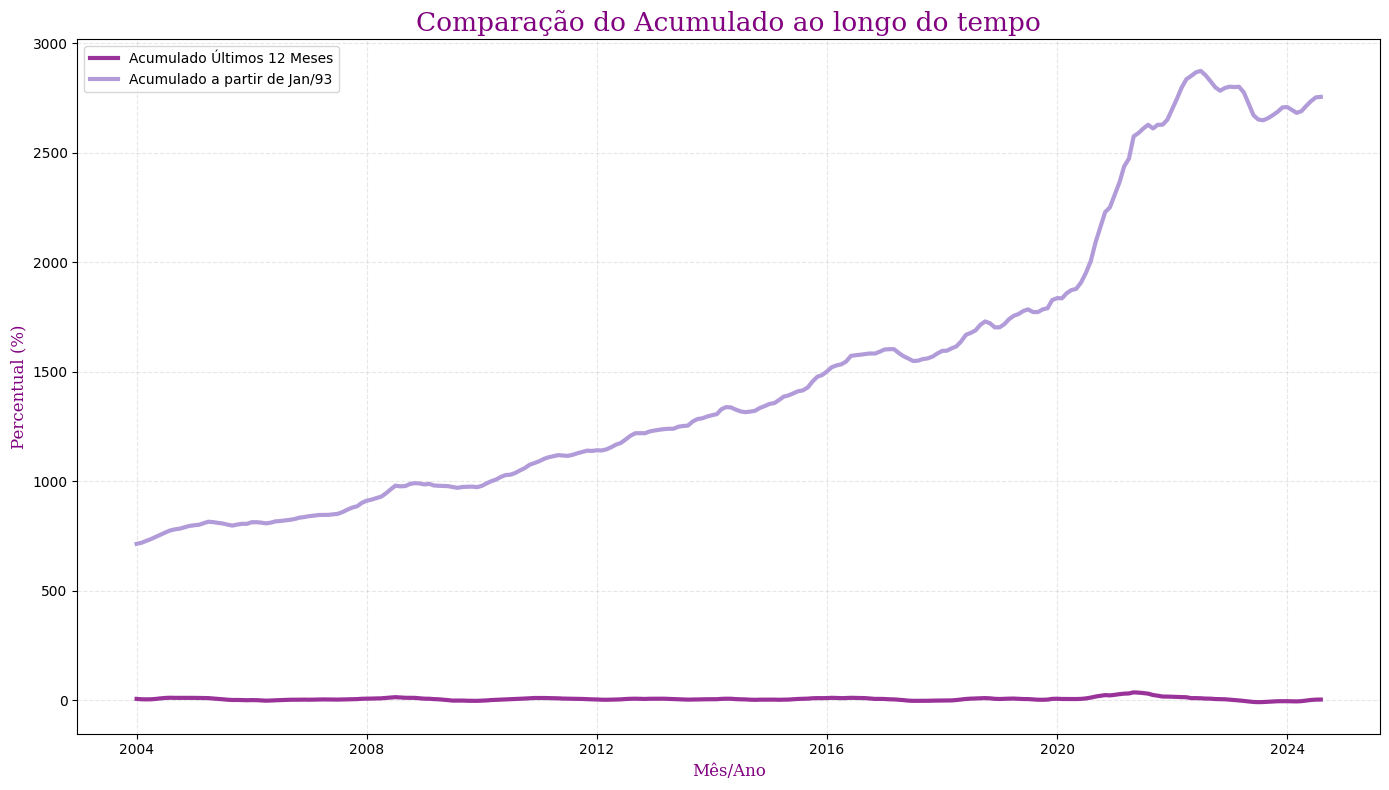

In [ ]:
df['M√™s/Ano'] = pd.to_datetime(df['M√™s/Ano'], format='%B/%Y', errors='coerce')
df = df.sort_values(by='M√™s/Ano').reset_index(drop=True)

#plotando o acumulado nos √∫ltimos 12 meses e o acumulado a partir de janeiro de 1993
plt.figure(figsize=(14, 8))
plt.plot(df['M√™s/Ano'], df['Acumulado nos √öltimos 12 Meses (%)'], linestyle='-', color='#993399', linewidth = 3, label='Acumulado √öltimos 12 Meses')
plt.plot(df['M√™s/Ano'], df['Acumulado a partir de Jan/93'], linestyle='-', color='#b19cd9', linewidth = 3, label='Acumulado a partir de Jan/93')

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

plt.title('Compara√ß√£o do Acumulado ao longo do tempo', fontdict=font1)
plt.xlabel('M√™s/Ano', fontdict=font2)
plt.ylabel('Percentual (%)',fontdict=font2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()

plt.show()


# üßÆüè† **Exemplo pr√°tico:** Calculadora de reajuste de aluguel com base no IGP-M de agosto de 2024

### O objetivo √© demonstrar como o valor do aluguel pode ser ajustado com base no √çndice Geral de Pre√ßos do Mercado (IGP-M). O c√°lculo √© realizado utilizando o valor acumulado do IGP-M nos √∫ltimos 12 meses at√© agosto de 2024.

In [31]:
valor_atual_aluguel = float(input("üí∏‚û°Ô∏è Digite o valor atual do aluguel em reais: "))
print(f"‚úÖüè° Confirmando o valor atual do aluguel: R$ {valor_atual_aluguel:.2f}")

# determinando o IGP-M acumulado nos √∫ltimos 12 meses considerando agosto de 2024
igpm_acumulado_12_meses = df['Acumulado nos √öltimos 12 Meses (%)'].iloc[-1] #√∫ltimo m√™s do dataframe

# porcentagem para decimal
igpm_acumulado_decimal = igpm_acumulado_12_meses / 100

# novo valor do aluguel
novo_valor_aluguel = valor_atual_aluguel * (1 + igpm_acumulado_decimal)

print(f"üìà IGP-M acumulado nos √∫ltimos 12 meses: {igpm_acumulado_12_meses:.2f}%")
print(f"üí∞ Com o reajuste voc√™ pagar√° um aluguel de R$ {novo_valor_aluguel:.2f}")



üí∏‚û°Ô∏è Digite o valor atual do aluguel em reais: 1500
‚úÖüè° Confirmando o valor atual do aluguel: R$ 1500.00
üìà IGP-M acumulado nos √∫ltimos 12 meses: 4.26%
üí∞ Com o reajuste voc√™ pagar√° um aluguel de R$ 1563.90
